In [1]:
import pandas as pd

In [2]:
# Initialize an empty list to store the lines
lines = []

# Trying to read the file line by line
try:
    with open('mabel.txt', 'r', encoding='utf8') as file:
        for line in file:
            # Trying to append the line to the list
            try:
                lines.append(line)
            except pd.errors.ParserError as e:
                print(f"Error parsing line: {e}")
                # Handling the error as needed
except Exception as e:
    print(f"Error reading file: {e}")

# Converting the list of lines to a DataFrame
df = pd.DataFrame(lines, columns=["text"])
df.head()


,text
0,"05/12/19, 1:42 pm - Messages to this chat and ..."
1,"05/12/19, 1:42 pm - Mabel Infoziant: Hi this i..."
2,"05/12/19, 1:42 pm - Mabel Infoziant: What’s yo..."
3,"05/12/19, 1:42 pm - AR❤: Ramisha Rani K\n"
4,"05/12/19, 1:42 pm - Mabel Infoziant: Ok\n"


#### Extracting information using regular expressions
df= df['text'].str.extract(r'(\d{1,2}/\d{1,2}/\d{1,2}), (\d{1,2}:\d{1,2} [apmAPM]+) - ([^:]+): (.+)')
df.head()

#### Naming the columns
df.columns = ['Date', 'Time', 'Name', 'Chat']
df.head()

#### Dropping 1st row
df=df.drop(0)
df.head()

# Consolidate Version of Above Codes Below Code 2

In [3]:
# Extracting information using regular expressions
df= df['text'].str.extract(r'(\d{1,2}/\d{1,2}/\d{1,2}), (\d{1,2}:\d{1,2} [apmAPM]+) - ([^:]+): (.+)')


# Naming the columns
df.columns = ['Date', 'Time', 'Name', 'Chat']

# Dropping 1st row
df=df.drop(0)
df.head()

,Date,Time,Name,Chat
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K
4,05/12/19,1:42 pm,Mabel Infoziant,Ok
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 1 to 52
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    52 non-null     object
 1   Time    52 non-null     object
 2   Name    52 non-null     object
 3   Chat    52 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


In [5]:
#pip install nltk

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [7]:
dataset=df

dataset.dropna(inplace=True)
dataset.head()

,Date,Time,Name,Chat
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K
4,05/12/19,1:42 pm,Mabel Infoziant,Ok
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com


In [8]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/viswanathanmuthu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
sid = SentimentIntensityAnalyzer()
sid

In [10]:
senti=sid.polarity_scores(dataset['Chat'][4])
senti

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.296}

In [11]:
 def sentimentalAnalysis(data,columnname):
        
        #downloading vader_lexicon for the process
        import matplotlib.pyplot as plt
        import seaborn as sns
        "Importing Necessary Packeage"
        from nltk.sentiment.vader import SentimentIntensityAnalyzer
        sid = SentimentIntensityAnalyzer()
        
        "Deleting null pr empty value"
        data.dropna(inplace=True)
        
        "Checking for a comment"
        #sid.polarity_scores(data[columnname][93])
        
        "Creating respective columns"
        
        data['scores'] = data[columnname].apply(lambda commentText: sid.polarity_scores(commentText))
        data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])
        data['Negtive']  = data['scores'].apply(lambda score_dict: score_dict['neg'])
        data['Postive']  = data['scores'].apply(lambda score_dict: score_dict['pos'])
        data['Neutral']  = data['scores'].apply(lambda score_dict: score_dict['neu'])
        
        "Creating final pos or neg using compound score"
        data['comp_score'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
        plt.clf()
        #comp=sns.countplot(x = 'comp_score', hue = 'Name', data = data, palette = 'magma')
        #comp.figure.savefig("date_charts.png")
        "Checking how many pos and neg"
        posneg=pd.DataFrame(data['comp_score'].value_counts())
        return posneg,data
    

In [12]:
pos,data_Senti=sentimentalAnalysis(dataset,columnname='Chat')

<Figure size 640x480 with 0 Axes>

In [13]:
data_Senti

,Date,Time,Name,Chat,scores,compound,Negtive,Postive,Neutral,comp_score
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
4,05/12/19,1:42 pm,Mabel Infoziant,Ok,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2960,0.000,1.000,0.000,pos
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
6,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
7,05/12/19,1:43 pm,AR❤,Yes Mam,"{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...",0.4019,0.000,0.730,0.270,pos
8,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
9,05/12/19,1:43 pm,AR❤,Yeah mam,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,0.000,0.688,0.312,pos
10,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos


In [14]:
pos

,count
comp_score,
pos,49
neg,3


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating a CountVectorizer
cv=CountVectorizer(max_df=0.95,min_df=2,stop_words='english')
dtm=cv.fit_transform(df["Chat"])

In [16]:
from sklearn.decomposition import LatentDirichletAllocation

# Fitting an LatentDirichletAllocation model
lda_model=LatentDirichletAllocation(n_components=5,random_state=42)
lda_model.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [17]:
# Displaying top words for each topic
for index,topic in enumerate(lda_model.components_):
    results=([cv.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print(results)

['yes', 'share', 'need', 'finiliaze', 'soon', 'sure', 'sent', 'details', 'project', 'mam']
['yes', 'yeah', 'need', 'ask', 'ramisha', 'kk', 'abstract', 'read', 'ok', 'mam']
['phone', 'students', 'share', 'need', 'just', 'know', 'church', 'hi', 'office', 'tomorrow']
['meeting', 'mam', 'sent', 'send', 'vignesh', 'yes', 'yeah', 'abstracts', 'ml', 'start']
['details', 'office', 'students', 'phone', 'meeting', 'think', 'number', 'ask', 'vignesh', 'send']


In [18]:
# Transforming the data to get topic results
topic_results=lda_model.transform(dtm)

# Assignning topics to the DataFrame
df["Topic"]=topic_results.argmax(axis=1)
df

,Date,Time,Name,Chat,scores,compound,Negtive,Postive,Neutral,comp_score,Topic
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,2
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,0
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,1
4,05/12/19,1:42 pm,Mabel Infoziant,Ok,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2960,0.000,1.000,0.000,pos,1
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,0
6,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,0
7,05/12/19,1:43 pm,AR❤,Yes Mam,"{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...",0.4019,0.000,0.730,0.270,pos,1
8,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,3
9,05/12/19,1:43 pm,AR❤,Yeah mam,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,0.000,0.688,0.312,pos,3
10,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,0


In [19]:
df["Topic"].value_counts()

Topic
1    19
0    15
2     7
3     6
4     5
Name: count, dtype: int64

In [20]:
dataset=df
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/viswanathanmuthu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

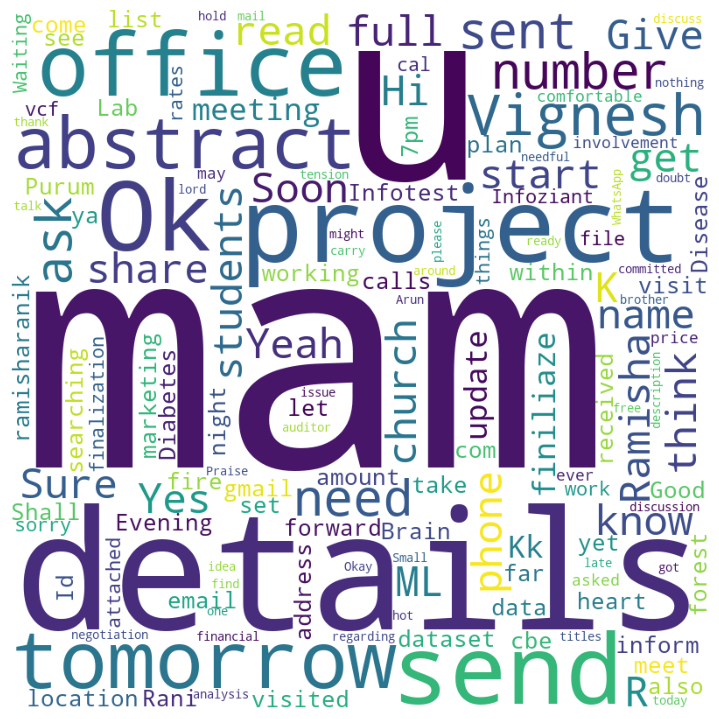

Successfully created


In [21]:

comment_words = []
stoplist = stopwords.words('english')
stoplist.extend(['omitted', 'voice','missed','call','video','deleted','media','message'])
wordcloudss="This function saves image"
dataset.index=range(dataset.shape[0])
for i in range(1,len(dataset)): 
    comment_words.append(dataset['Chat'][i])
    vv=" ".join(comment_words)          
    wordcloud = WordCloud(width = 800, height = 800, 
                                background_color ='white', 
                                      stopwords = stoplist, 
                                      min_font_size = 10).generate(vv)         
plt.figure(figsize = (9, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('wordcloud.PNG')
plt.show() 
print("Successfully created")
wordcloudss="This function saves image"
